In [1]:
import json

# Define the bounding box coordinates
bounding_box = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [92.68761634826659, 11.69437229633331],  # Southwest
                    [92.71622659172861, 11.69437229633331],  # Southeast
                    [92.71622659172861, 11.728017926216122], # Northeast
                    [92.68761634826659, 11.728017926216122], # Northwest
                    [92.68761634826659, 11.69437229633331]   # Closing the loop
                ]]
            },
            "properties": {
                "name": "Andaman123"
            }
        }
    ]
}

# Save as a GeoJSON file
output_file = "andaman123.geojson"
with open(output_file, "w") as f:
    json.dump(bounding_box, f, indent=4)

print(f"GeoJSON file saved as {output_file}")


GeoJSON file saved as andaman123.geojson


In [5]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20084\1474344782.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20084\1474344782.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


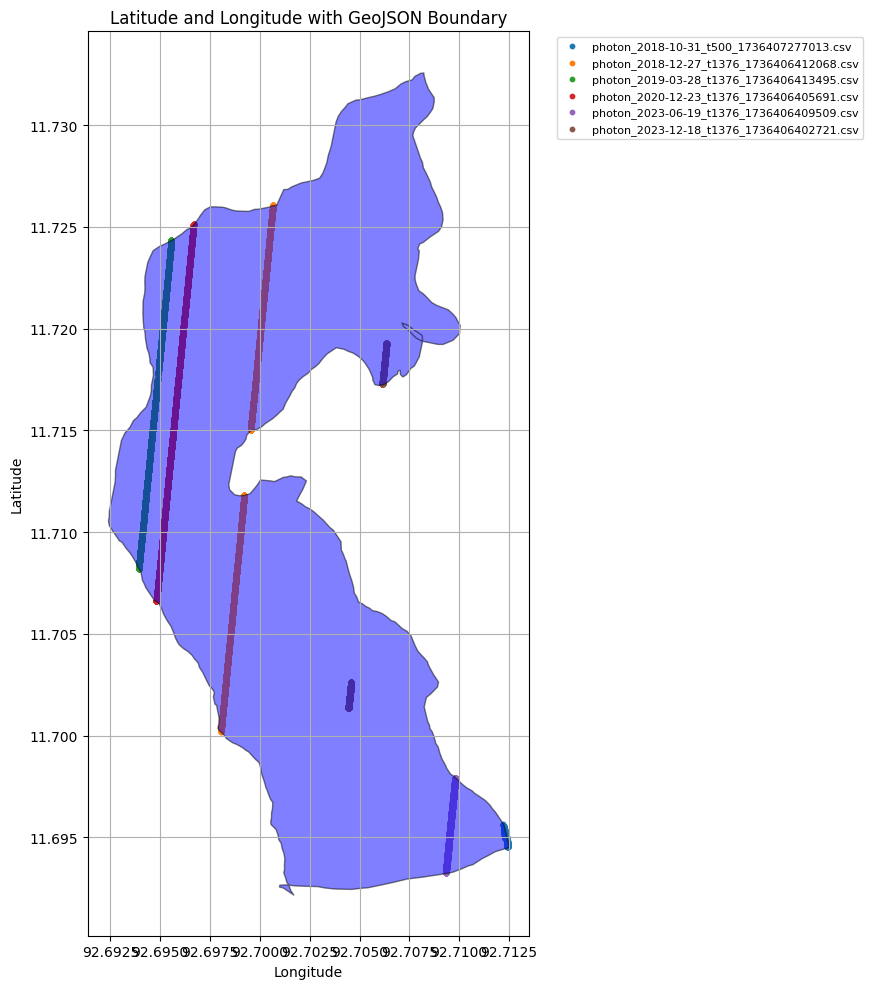

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\b9b141a2-ce55-11ef-b324-3b31a4cb5253.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Initialize the plot
plt.figure(figsize=(12, 10))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, plot them
            if not points_in_geojson.empty:
                plt.scatter(points_in_geojson['longitude'], points_in_geojson['latitude'], s=10, label=file_name)

# Plot the GeoJSON boundary
geojson_data.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="GeoJSON Region")

# Customize the plot
plt.title("Latitude and Longitude with GeoJSON Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()

In [41]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN"

# GeoJSON file path
geojson_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\b9b141a2-ce55-11ef-b324-3b31a4cb5253.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Create an empty list to store filtered data
all_filtered_data = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, append them to the list
            if not points_in_geojson.empty:
                all_filtered_data.append(df.loc[points_in_geojson.index])

# Combine all the filtered data into a single DataFrame
final_filtered_data = pd.concat(all_filtered_data, ignore_index=True)

# Define the output path for the combined CSV file
output_path = os.path.join(folder_path, "combined_final_data.csv")

# Save the combined filtered data to a new CSV file
final_filtered_data.to_csv(output_path, index=False)

print(f"Saved all filtered data to {output_path}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20084\298281740.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union


Saved all filtered data to C:\Users\Lenovo\CSIR NIO\ANDAMAN\combined_final_data.csv


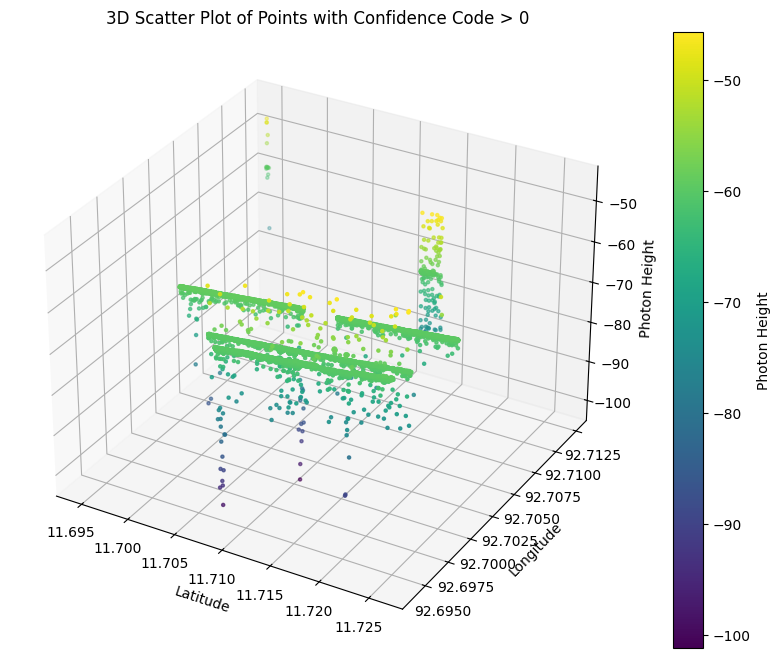

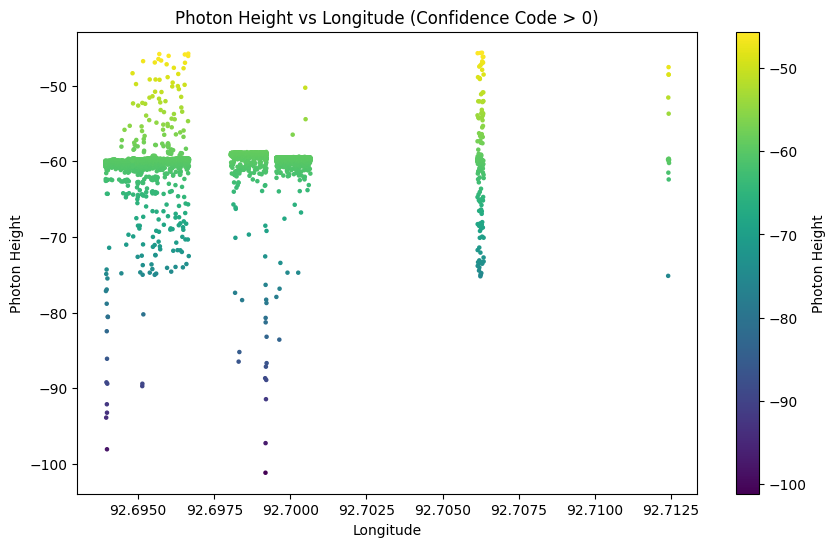

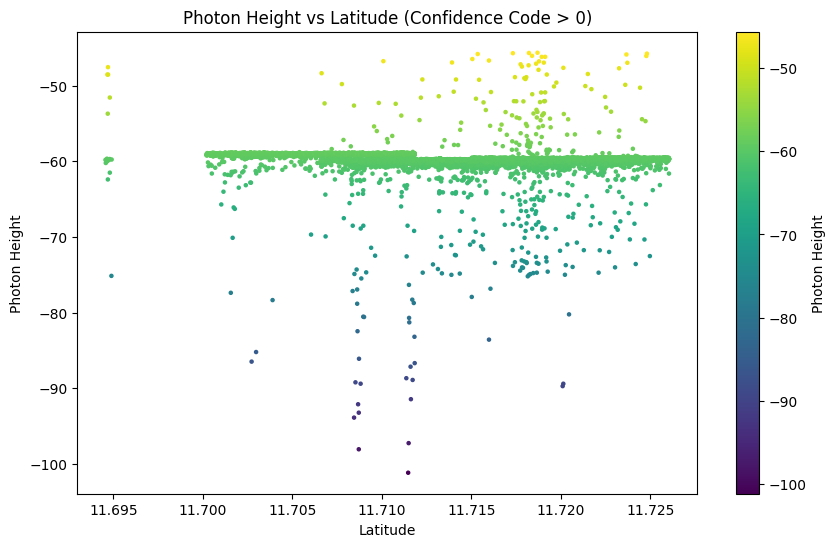

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\combined_final_data.csv"
data = pd.read_csv(file_path)

# Filter points where confidence code > 0
filtered_data = data[data["confidence code"] > 0]

# Extract relevant columns
latitude = filtered_data["latitude"]
longitude = filtered_data["longitude"]
photon_height = filtered_data["photon height"]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latitude, longitude, photon_height, c=photon_height, cmap='viridis', s=5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Photon Height")
ax.set_title("3D Scatter Plot of Points with Confidence Code > 0")
plt.colorbar(scatter, ax=ax, label="Photon Height")
plt.show()

# Photon Height vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Longitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Longitude (Confidence Code > 0)")
plt.colorbar(label="Photon Height")
plt.show()

# Photon Height vs Latitude
plt.figure(figsize=(10, 6))
plt.scatter(latitude, photon_height, c=photon_height, cmap='viridis', s=5)
plt.xlabel("Latitude")
plt.ylabel("Photon Height")
plt.title("Photon Height vs Latitude (Confidence Code > 0)")
plt.colorbar(label="Photon Height")
plt.show()


In [16]:
pip install fastkml geojson



SyntaxError: invalid syntax (479003959.py, line 1)

In [18]:
pip install fastkml geojsoN

   ---------------------------------------- 0.0/107.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.9 kB ? eta -:--:--
   ------------------------------------- -- 102.4/107.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 107.9/107.9 kB 895.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import zipfile
import os
from fastkml import KML
import geojson

def kmz_to_geojson(kmz_file, output_geojson):
    # Extract the KMZ file
    with zipfile.ZipFile(kmz_file, 'r') as kmz:
        kmz.extractall("temp_kmz")

    # Locate the KML file (usually the main one is "doc.kml")
    kml_file = None
    for root, dirs, files in os.walk("temp_kmz"):
        for file in files:
            if file.endswith(".kml"):
                kml_file = os.path.join(root, file)
                break

    if not kml_file:
        raise FileNotFoundError("No KML file found in KMZ.")

    # Parse the KML file
    with open(kml_file, 'rt', encoding='utf-8') as f:
        kml_data = f.read()

    kml = KML()
    kml.from_string(kml_data)

    # Convert KML to GeoJSON
    features = []
    for feature in kml.features():
        geojson_feature = geojson.Feature(geometry=feature.geometry, properties=feature.extended_data)
        features.append(geojson_feature)

    geojson_data = geojson.FeatureCollection(features)

    # Save the GeoJSON
    with open(output_geojson, 'w', encoding='utf-8') as f:
        geojson.dump(geojson_data, f, indent=2)

    # Clean up extracted files
    for root, dirs, files in os.walk("temp_kmz", topdown=False):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            os.rmdir(os.path.join(root, dir))
    os.rmdir("temp_kmz")

    print(f"Converted {kmz_file} to {output_geojson}.")

# Example usage
kmz_to_geojson("andamanlastandfinal.kmz", "output.geojson")


FileNotFoundError: [Errno 2] No such file or directory: 'andamanlastandfinal.kmz'

In [22]:
import zipfile
import os
from fastkml import KML
import geojson

def kmz_to_geojson(kmz_file, output_geojson):
    # Extract the KMZ file
    with zipfile.ZipFile(kmz_file, 'r') as kmz:
        kmz.extractall("temp_kmz")

    # Locate the KML file (usually the main one is "doc.kml")
    kml_file = None
    for root, dirs, files in os.walk("temp_kmz"):
        for file in files:
            if file.endswith(".kml"):
                kml_file = os.path.join(root, file)
                break

    if not kml_file:
        raise FileNotFoundError("No KML file found in KMZ.")

    # Parse the KML file
    with open(kml_file, 'rt', encoding='utf-8') as f:
        kml_data = f.read()

    kml = KML()
    kml.from_string(kml_data)

    # Convert KML to GeoJSON
    features = []
    for feature in kml.features():
        geojson_feature = geojson.Feature(geometry=feature.geometry, properties=feature.extended_data)
        features.append(geojson_feature)

    geojson_data = geojson.FeatureCollection(features)

    # Save the GeoJSON
    with open(output_geojson, 'w', encoding='utf-8') as f:
        geojson.dump(geojson_data, f, indent=2)

    # Clean up extracted files
    for root, dirs, files in os.walk("temp_kmz", topdown=False):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            os.rmdir(os.path.join(root, dir))
    os.rmdir("temp_kmz")

    print(f"Converted {kmz_file} to {output_geojson}.")

# Interactive Input
kmz_file = input("Enter the path to the KMZ file: ").strip()
output_geojson = input("Enter the output GeoJSON file name (with .geojson extension): ").strip()

try:
    kmz_to_geojson(kmz_file, output_geojson)
except Exception as e:
    print(f"An error occurred: {e}")


Enter the path to the KMZ file:  f
Enter the output GeoJSON file name (with .geojson extension):  u


An error occurred: [Errno 2] No such file or directory: 'f'


In [31]:
import zipfile
import os
from fastkml import KML
import geojson

def kmz_to_geojson(kmz_file, output_geojson):
    # Extract the KMZ file
    with zipfile.ZipFile(kmz_file, 'r') as kmz:
        kmz.extractall("temp_kmz")

    # Locate the KML file (usually the main one is "doc.kml")
    kml_file = None
    for root, dirs, files in os.walk("temp_kmz"):
        for file in files:
            if file.endswith(".kml"):
                kml_file = os.path.join(root, file)
                break

    if not kml_file:
        raise FileNotFoundError("No KML file found in KMZ.")

    # Parse the KML file
    with open(kml_file, 'rt', encoding='utf-8') as f:
        kml_data = f.read()

    kml = KML()
    kml.from_string(kml_data)

    # Convert KML to GeoJSON
    features = []
    for feature in kml.features():
        geojson_feature = geojson.Feature(geometry=feature.geometry, properties=feature.extended_data)
        features.append(geojson_feature)

    geojson_data = geojson.FeatureCollection(features)

    # Save the GeoJSON
    with open(output_geojson, 'w', encoding='utf-8') as f:
        geojson.dump(geojson_data, f, indent=2)

    # Clean up extracted files
    for root, dirs, files in os.walk("temp_kmz", topdown=False):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            os.rmdir(os.path.join(root, dir))
    os.rmdir("temp_kmz")

    print(f"Converted {kmz_file} to {output_geojson}.")

# File paths defined within the code
kmz_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\andamanlastandfinal.kmz" 
output_geojson = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\geoandaman.geojson"   
try:
    kmz_to_geojson(kmz_file, output_geojson)
except Exception as e:
    print(f"An error occurred: {e}") 

An error occurred: [Errno 2] No such file or directory: 'path/to/your/input_file.kmz'


In [33]:
import zipfile
import os
from fastkml import KML
import geojson

def kmz_to_geojson(kmz_file, output_geojson):
    # Extract the KMZ file
    with zipfile.ZipFile(kmz_file, 'r') as kmz:
        kmz.extractall("temp_kmz")

    # Locate the KML file (usually the main one is "doc.kml")
    kml_file = None
    for root, dirs, files in os.walk("temp_kmz"):
        for file in files:
            if file.endswith(".kml"):
                kml_file = os.path.join(root, file)
                break

    if not kml_file:
        raise FileNotFoundError("No KML file found in KMZ.")

    # Parse the KML file
    with open(kml_file, 'rt', encoding='utf-8') as f:
        kml_data = f.read()

    kml = KML()
    kml.from_string(kml_data)

    # Convert KML to GeoJSON
    features = []
    for feature in kml.features():
        geojson_feature = geojson.Feature(geometry=feature.geometry, properties=feature.extended_data)
        features.append(geojson_feature)

    geojson_data = geojson.FeatureCollection(features)

    # Save the GeoJSON
    with open(output_geojson, 'w', encoding='utf-8') as f:
        geojson.dump(geojson_data, f, indent=2)

    # Clean up extracted files
    for root, dirs, files in os.walk("temp_kmz", topdown=False):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            os.rmdir(os.path.join(root, dir))
    os.rmdir("temp_kmz")

    print(f"Converted {kmz_file} to {output_geojson}.")

# File paths defined within the code
kmz_path = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\andamanlastandfinal.kmz" 
output_geojson = r"C:\Users\Lenovo\CSIR NIO\ANDAMAN\geoandaman.geojson"   
try:
    kmz_to_geojson(kmz_file, output_geojson)
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: [Errno 2] No such file or directory: 'path/to/your/input_file.kmz'


In [37]:
import geojson

# Extracted coordinates from the link
minx, miny = 92.6873929416447, 11.693154237554648
maxx, maxy = 92.71245550267986, 11.730576417730429

# Define the coordinates of the bounding box as a polygon
coordinates = [
    [
        [minx, miny],  # Bottom-left
        [maxx, miny],  # Bottom-right
        [maxx, maxy],  # Top-right
        [minx, maxy],  # Top-left
        [minx, miny],  # Close the polygon
    ]
]

# Create a GeoJSON Feature
bounding_box_feature = geojson.Feature(
    geometry=geojson.Polygon(coordinates),
    properties={"name": "Andaman Bounding Box"}
)

# Create a GeoJSON FeatureCollection
geojson_data = geojson.FeatureCollection([bounding_box_feature])

# Save to a GeoJSON file
output_file = "andamanbox.geojson"
with open(output_file, "w", encoding="utf-8") as f:
    geojson.dump(geojson_data, f, indent=2)

print(f"GeoJSON file created successfully: {output_file}")


GeoJSON file created successfully: andamanbox.geojson


In [51]:
import math

while True:
    # Input two numbers
    a = float(input("Enter the first number (a): "))
    b = float(input("Enter the second number (b): "))

    # Calculate the expression
    try:
        result = math.sqrt(a**2 + b**2 - (a**2 * b**2))
        print(f"The result of the expression is: {result}")
    except ValueError:
        print("The result is invalid (e.g., negative value under square root).")

    # Ask if the user wants to continue
    choice = input("Do you want to calculate again? (yes to continue, no to stop): ").strip().lower()
    if choice not in ['yes', 'y']:
        print("Goodbye!")
        break



Enter the first number (a):  0.2
Enter the second number (b):  0.2


The result of the expression is: 0.28


Do you want to calculate again? (yes to continue, no to stop):  yes
Enter the first number (a):  0.3
Enter the second number (b):  0.1


The result of the expression is: 0.3148015247739439


Do you want to calculate again? (yes to continue, no to stop):  yes
Enter the first number (a):  0.1
Enter the second number (b):  0.1


The result of the expression is: 0.14106735979665885


Do you want to calculate again? (yes to continue, no to stop):  0.3


Goodbye!


In [1]:
import numpy as np

def compute_matrix_energy(matrix):
    """
    Compute the energy of a matrix based on its eigenvalues.
    """
    eigenvalues = np.linalg.eigvals(matrix)
    mean_eigenvalue = np.mean(eigenvalues)
    energy = sum(abs(eigenvalue - mean_eigenvalue) for eigenvalue in eigenvalues)
    return energy

def compute_ifm_energy(true_matrix, false_matrix):
    """
    Compute the energy of an Intuitionistic Fuzzy Matrix (IFM).
    """
    true_energy = compute_matrix_energy(true_matrix)
    false_energy = compute_matrix_energy(false_matrix)
    return true_energy, false_energy

def compute_score_and_accuracy(true_energy, false_energy):
    """
    Compute score and accuracy based on true and false energies.
    """
    score = true_energy - false_energy
    accuracy = true_energy + false_energy
    return score, accuracy

def main():
    # Input data for the example
    print("Step 1: Define Decision Maker Weights and Attribute Weights")
    decision_maker_weights = np.array([
        [0.9, 0.1],
        [0.8, 0.2],
        [0.7, 0.3]
    ])

    attribute_weights = np.array([
        [[0.8, 0.1], [0.9, 0.1], [0.8, 0.2], [0.7, 0.3]],
        [[0.8, 0.2], [0.7, 0.3], [0.8, 0.1], [0.8, 0.2]],
        [[0.9, 0.1], [0.6, 0.3], [0.7, 0.3], [0.8, 0.1]]
    ])

    print("Decision Maker Weights:\n", decision_maker_weights)
    print("Attribute Weights:\n", attribute_weights)

    print("\nStep 2: Define Alternatives and Their Evaluations")
    alternatives = [
        np.array([
            [[0.7, 0.2], [0.8, 0.1], [0.7, 0.2], [0.6, 0.4]],
            [[0.8, 0.2], [0.7, 0.3], [0.6, 0.4], [0.6, 0.3]],
            [[0.6, 0.3], [0.7, 0.1], [0.8, 0.2], [0.9, 0.1]]
        ]),
        np.array([
            [[0.6, 0.3], [0.8, 0.2], [0.7, 0.3], [0.7, 0.3]],
            [[0.7, 0.2], [0.7, 0.3], [0.6, 0.4], [0.7, 0.2]],
            [[0.8, 0.1], [0.7, 0.1], [0.8, 0.2], [0.8, 0.1]]
        ]),
        np.array([
            [[0.8, 0.2], [0.7, 0.1], [0.8, 0.2], [0.7, 0.3]],
            [[0.7, 0.3], [0.6, 0.3], [0.7, 0.2], [0.7, 0.2]],
            [[0.7, 0.3], [0.6, 0.4], [0.7, 0.3], [0.8, 0.1]]
        ]),
        np.array([
            [[0.7, 0.3], [0.6, 0.2], [0.7, 0.1], [0.6, 0.3]],
            [[0.6, 0.3], [0.7, 0.1], [0.7, 0.2], [0.7, 0.3]],
            [[0.8, 0.2], [0.8, 0.1], [0.9, 0.1], [0.7, 0.2]]
        ])
    ]

    for idx, alternative in enumerate(alternatives, start=1):
        print(f"Alternative Q{idx}:\n", alternative)

    print("\nStep 3: Compute Weighted Matrices")
    results = []
    for idx, alternative in enumerate(alternatives, start=1):
        # Compute true and false weighted matrices
        true_matrix = np.sum(attribute_weights[:, :, 0] * alternative[:, :, 0].T, axis=1)
        false_matrix = np.sum(attribute_weights[:, :, 1] + alternative[:, :, 1].T - attribute_weights[:, :, 1] * alternative[:, :, 1].T, axis=1)

        true_matrix = np.dot(true_matrix, true_matrix.T)
        false_matrix = np.dot(false_matrix, false_matrix.T)

        # Compute energies
        true_energy, false_energy = compute_ifm_energy(true_matrix, false_matrix)

        # Compute score and accuracy
        score, accuracy = compute_score_and_accuracy(true_energy, false_energy)

        results.append((idx, true_energy, false_energy, score, accuracy))

        print(f"Alternative Q{idx}:")
        print("  True Energy:", true_energy)
        print("  False Energy:", false_energy)
        print("  Score:", score)
        print("  Accuracy:", accuracy)

    print("\nStep 4: Rank Alternatives")
    results.sort(key=lambda x: x[3], reverse=True)
    for idx, result in enumerate(results, start=1):
        print(f"Rank {idx}: Alternative Q{result[0]} with Score: {result[3]} and Accuracy: {result[4]}")

if __name__ == "__main__":
    main()

Step 1: Define Decision Maker Weights and Attribute Weights
Decision Maker Weights:
 [[0.9 0.1]
 [0.8 0.2]
 [0.7 0.3]]
Attribute Weights:
 [[[0.8 0.1]
  [0.9 0.1]
  [0.8 0.2]
  [0.7 0.3]]

 [[0.8 0.2]
  [0.7 0.3]
  [0.8 0.1]
  [0.8 0.2]]

 [[0.9 0.1]
  [0.6 0.3]
  [0.7 0.3]
  [0.8 0.1]]]

Step 2: Define Alternatives and Their Evaluations
Alternative Q1:
 [[[0.7 0.2]
  [0.8 0.1]
  [0.7 0.2]
  [0.6 0.4]]

 [[0.8 0.2]
  [0.7 0.3]
  [0.6 0.4]
  [0.6 0.3]]

 [[0.6 0.3]
  [0.7 0.1]
  [0.8 0.2]
  [0.9 0.1]]]
Alternative Q2:
 [[[0.6 0.3]
  [0.8 0.2]
  [0.7 0.3]
  [0.7 0.3]]

 [[0.7 0.2]
  [0.7 0.3]
  [0.6 0.4]
  [0.7 0.2]]

 [[0.8 0.1]
  [0.7 0.1]
  [0.8 0.2]
  [0.8 0.1]]]
Alternative Q3:
 [[[0.8 0.2]
  [0.7 0.1]
  [0.8 0.2]
  [0.7 0.3]]

 [[0.7 0.3]
  [0.6 0.3]
  [0.7 0.2]
  [0.7 0.2]]

 [[0.7 0.3]
  [0.6 0.4]
  [0.7 0.3]
  [0.8 0.1]]]
Alternative Q4:
 [[[0.7 0.3]
  [0.6 0.2]
  [0.7 0.1]
  [0.6 0.3]]

 [[0.6 0.3]
  [0.7 0.1]
  [0.7 0.2]
  [0.7 0.3]]

 [[0.8 0.2]
  [0.8 0.1]
  [0.9 0.1]
  [0.7

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [2]:
import numpy as np

def calculate_false_value(f1, f2):
    """Calculate the updated false value based on the new formula."""
    return np.sqrt(f1**2 + f2**2 - (f1**2 * f2**2))

def calculate_matrix_energy(matrix):
    """Calculate the energy of a given matrix."""
    eigenvalues = np.linalg.eigvals(matrix)
    mean_eigenvalue = np.mean(eigenvalues)
    energy = sum(abs(eig - mean_eigenvalue) for eig in eigenvalues)
    return energy.real  # Use real part for numerical stability

def create_weighted_ifms(ifms, weights, use_false_formula=False):
    """Create weighted IFMs using updated false value formula if specified."""
    weighted_ifms = []
    for ifm in ifms:
        true_matrix = weights['true'] * ifm['true']
        if use_false_formula:
            false_matrix = np.vectorize(calculate_false_value)(
                weights['false'], ifm['false']
            )
        else:
            false_matrix = weights['false'] + ifm['false'] - weights['false'] * ifm['false']
        weighted_ifms.append({'true': true_matrix, 'false': false_matrix})
    return weighted_ifms

def calculate_scores_and_accuracies(ifms):
    """Calculate scores and accuracies for IFMs."""
    results = []
    for ifm in ifms:
        true_energy = calculate_matrix_energy(ifm['true'])
        false_energy = calculate_matrix_energy(ifm['false'])
        score = true_energy - false_energy
        accuracy = true_energy + false_energy
        results.append({'score': score, 'accuracy': accuracy})
    return results

# Example Data (as per the provided problem)
decision_makers_weights = {'true': np.array([0.9, 0.8, 0.7]), 'false': np.array([0.1, 0.2, 0.3])}
attribute_weights = {'true': np.array([[0.8, 0.9, 0.8, 0.7], [0.8, 0.7, 0.8, 0.8], [0.9, 0.6, 0.7, 0.8]]),
                     'false': np.array([[0.1, 0.1, 0.2, 0.3], [0.2, 0.3, 0.1, 0.2], [0.1, 0.3, 0.3, 0.1]])}

alternatives_ifms = [
    {'true': np.array([[0.7, 0.8, 0.7, 0.6], [0.8, 0.7, 0.6, 0.6], [0.6, 0.7, 0.8, 0.9]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.4], [0.2, 0.3, 0.4, 0.3], [0.3, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.6, 0.8, 0.7, 0.7], [0.7, 0.7, 0.6, 0.7], [0.8, 0.7, 0.8, 0.8]]),
     'false': np.array([[0.3, 0.2, 0.3, 0.3], [0.2, 0.3, 0.4, 0.2], [0.1, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.8, 0.7, 0.8, 0.7], [0.7, 0.6, 0.7, 0.7], [0.7, 0.6, 0.7, 0.8]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.3], [0.3, 0.3, 0.2, 0.2], [0.3, 0.4, 0.3, 0.1]])},
    {'true': np.array([[0.7, 0.6, 0.7, 0.6], [0.6, 0.7, 0.7, 0.7], [0.8, 0.8, 0.9, 0.7]]),
     'false': np.array([[0.3, 0.2, 0.1, 0.3], [0.3, 0.1, 0.2, 0.3], [0.2, 0.1, 0.1, 0.2]])}
]

# Step 1: Create weighted IFMs
weighted_ifms = create_weighted_ifms(alternatives_ifms, decision_makers_weights, use_false_formula=True)

# Step 2: Calculate Scores and Accuracies
results = calculate_scores_and_accuracies(weighted_ifms)

# Step 3: Rank Alternatives
ranked_alternatives = sorted(enumerate(results), key=lambda x: x[1]['score'], reverse=True)

# Print Results
for idx, res in enumerate(ranked_alternatives, 1):
    alt_index = res[0] + 1
    print(f"Alternative Q{alt_index}: Score = {res[1]['score']:.4f}, Accuracy = {res[1]['accuracy']:.4f}")
print(f"\nBest alternative: Q{ranked_alternatives[0][0] + 1}")


ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

In [4]:
import numpy as np

def calculate_false_value(f1, f2):
    """Calculate the updated false value based on the new formula."""
    return np.sqrt(f1**2 + f2**2 - (f1**2 * f2**2))

def calculate_matrix_energy(matrix):
    """Calculate the energy of a given matrix."""
    eigenvalues = np.linalg.eigvals(matrix)
    mean_eigenvalue = np.mean(eigenvalues)
    energy = sum(abs(eig - mean_eigenvalue) for eig in eigenvalues)
    return energy.real  # Use real part for numerical stability

def create_weighted_ifms(ifms, weights, use_false_formula=False):
    """Create weighted IFMs using updated false value formula if specified."""
    weighted_ifms = []
    for ifm in ifms:
        # Reshape weights for broadcasting
        true_matrix = weights['true'][:, np.newaxis] * ifm['true']
        if use_false_formula:
            false_matrix = np.vectorize(calculate_false_value)(
                weights['false'][:, np.newaxis], ifm['false']
            )
        else:
            false_matrix = (
                weights['false'][:, np.newaxis]
                + ifm['false']
                - weights['false'][:, np.newaxis] * ifm['false']
            )
        weighted_ifms.append({'true': true_matrix, 'false': false_matrix})
    return weighted_ifms

def calculate_scores_and_accuracies(ifms):
    """Calculate scores and accuracies for IFMs."""
    results = []
    for ifm in ifms:
        true_energy = calculate_matrix_energy(ifm['true'])
        false_energy = calculate_matrix_energy(ifm['false'])
        score = true_energy - false_energy
        accuracy = true_energy + false_energy
        results.append({'score': score, 'accuracy': accuracy})
    return results

# Example Data (as per the provided problem)
decision_makers_weights = {'true': np.array([0.9, 0.8, 0.7]), 'false': np.array([0.1, 0.2, 0.3])}
attribute_weights = {'true': np.array([[0.8, 0.9, 0.8, 0.7], [0.8, 0.7, 0.8, 0.8], [0.9, 0.6, 0.7, 0.8]]),
                     'false': np.array([[0.1, 0.1, 0.2, 0.3], [0.2, 0.3, 0.1, 0.2], [0.1, 0.3, 0.3, 0.1]])}

alternatives_ifms = [
    {'true': np.array([[0.7, 0.8, 0.7, 0.6], [0.8, 0.7, 0.6, 0.6], [0.6, 0.7, 0.8, 0.9]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.4], [0.2, 0.3, 0.4, 0.3], [0.3, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.6, 0.8, 0.7, 0.7], [0.7, 0.7, 0.6, 0.7], [0.8, 0.7, 0.8, 0.8]]),
     'false': np.array([[0.3, 0.2, 0.3, 0.3], [0.2, 0.3, 0.4, 0.2], [0.1, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.8, 0.7, 0.8, 0.7], [0.7, 0.6, 0.7, 0.7], [0.7, 0.6, 0.7, 0.8]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.3], [0.3, 0.3, 0.2, 0.2], [0.3, 0.4, 0.3, 0.1]])},
    {'true': np.array([[0.7, 0.6, 0.7, 0.6], [0.6, 0.7, 0.7, 0.7], [0.8, 0.8, 0.9, 0.7]]),
     'false': np.array([[0.3, 0.2, 0.1, 0.3], [0.3, 0.1, 0.2, 0.3], [0.2, 0.1, 0.1, 0.2]])}
]

# Step 1: Create weighted IFMs
weighted_ifms = create_weighted_ifms(alternatives_ifms, decision_makers_weights, use_false_formula=True)

# Step 2: Calculate Scores and Accuracies
results = calculate_scores_and_accuracies(weighted_ifms)

# Step 3: Rank Alternatives
ranked_alternatives = sorted(enumerate(results), key=lambda x: x[1]['score'], reverse=True)

# Print Results
print("Results and Rankings:")
for idx, res in enumerate(ranked_alternatives, 1):
    alt_index = res[0] + 1
    print(f"Rank {idx}: Alternative Q{alt_index} - Score = {res[1]['score']:.4f}, Accuracy = {res[1]['accuracy']:.4f}")
print(f"\nBest alternative: Q{ranked_alternatives[0][0] + 1}")


LinAlgError: Last 2 dimensions of the array must be square

In [6]:
import numpy as np

def calculate_false_value(f1, f2):
    """Calculate the updated false value based on the new formula."""
    return np.sqrt(f1**2 + f2**2 - (f1**2 * f2**2))

def calculate_matrix_energy(matrix):
    """Calculate the energy of a given matrix."""
    eigenvalues = np.linalg.eigvals(matrix)
    mean_eigenvalue = np.mean(eigenvalues)
    energy = sum(abs(eig - mean_eigenvalue) for eig in eigenvalues)
    return energy.real  # Use real part for numerical stability

def create_weighted_ifms(ifms, weights, use_false_formula=False):
    """Create weighted IFMs using updated false value formula if specified."""
    weighted_ifms = []
    for ifm in ifms:
        # Reshape weights for broadcasting
        true_matrix = weights['true'][:, np.newaxis] * ifm['true']
        if use_false_formula:
            false_matrix = np.vectorize(calculate_false_value)(
                weights['false'][:, np.newaxis], ifm['false']
            )
        else:
            false_matrix = (
                weights['false'][:, np.newaxis]
                + ifm['false']
                - weights['false'][:, np.newaxis] * ifm['false']
            )
        weighted_ifms.append({'true': true_matrix, 'false': false_matrix})
    return weighted_ifms

def calculate_scores_and_accuracies(ifms):
    """Calculate scores and accuracies for IFMs."""
    results = []
    for ifm in ifms:
        # Create square matrices by multiplying with their transpose
        true_square = np.dot(ifm['true'], ifm['true'].T)
        false_square = np.dot(ifm['false'], ifm['false'].T)

        # Calculate energy
        true_energy = calculate_matrix_energy(true_square)
        false_energy = calculate_matrix_energy(false_square)

        # Compute score and accuracy
        score = true_energy - false_energy
        accuracy = true_energy + false_energy
        results.append({'score': score, 'accuracy': accuracy})
    return results

# Example Data
decision_makers_weights = {'true': np.array([0.9, 0.8, 0.7]), 'false': np.array([0.1, 0.2, 0.3])}
alternatives_ifms = [
    {'true': np.array([[0.7, 0.8, 0.7, 0.6], [0.8, 0.7, 0.6, 0.6], [0.6, 0.7, 0.8, 0.9]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.4], [0.2, 0.3, 0.4, 0.3], [0.3, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.6, 0.8, 0.7, 0.7], [0.7, 0.7, 0.6, 0.7], [0.8, 0.7, 0.8, 0.8]]),
     'false': np.array([[0.3, 0.2, 0.3, 0.3], [0.2, 0.3, 0.4, 0.2], [0.1, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.8, 0.7, 0.8, 0.7], [0.7, 0.6, 0.7, 0.7], [0.7, 0.6, 0.7, 0.8]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.3], [0.3, 0.3, 0.2, 0.2], [0.3, 0.4, 0.3, 0.1]])},
    {'true': np.array([[0.7, 0.6, 0.7, 0.6], [0.6, 0.7, 0.7, 0.7], [0.8, 0.8, 0.9, 0.7]]),
     'false': np.array([[0.3, 0.2, 0.1, 0.3], [0.3, 0.1, 0.2, 0.3], [0.2, 0.1, 0.1, 0.2]])}
]

# Step 1: Create weighted IFMs
weighted_ifms = create_weighted_ifms(alternatives_ifms, decision_makers_weights, use_false_formula=True)

# Step 2: Calculate Scores and Accuracies
results = calculate_scores_and_accuracies(weighted_ifms)

# Step 3: Rank Alternatives
ranked_alternatives = sorted(enumerate(results), key=lambda x: x[1]['score'], reverse=True)

# Print Results
print("Results and Rankings:")
for idx, res in enumerate(ranked_alternatives, 1):
    alt_index = res[0] + 1
    print(f"Rank {idx}: Alternative Q{alt_index} - Score = {res[1]['score']:.4f}, Accuracy = {res[1]['accuracy']:.4f}")
print(f"\nBest alternative: Q{ranked_alternatives[0][0] + 1}")


Results and Rankings:
Rank 1: Alternative Q4 - Score = 3.6149, Accuracy = 6.4991
Rank 2: Alternative Q2 - Score = 3.5971, Accuracy = 6.8687
Rank 3: Alternative Q3 - Score = 3.5950, Accuracy = 6.9590
Rank 4: Alternative Q1 - Score = 3.4631, Accuracy = 6.7589

Best alternative: Q4


In [8]:
import numpy as np

def calculate_false_value(f1, f2):
    """Calculate the updated false value based on the new formula."""
    return np.sqrt(f1**2 + f2**2 - (f1**2 * f2**2))

def calculate_matrix_energy(matrix):
    """Calculate the energy of a given matrix."""
    eigenvalues = np.linalg.eigvals(matrix)
    mean_eigenvalue = np.mean(eigenvalues)
    energy = sum(abs(eig - mean_eigenvalue) for eig in eigenvalues)
    return energy.real  # Use real part for numerical stability

def create_weighted_ifms(ifms, weights, use_false_formula=False):
    """Create weighted IFMs using updated false value formula if specified."""
    weighted_ifms = []
    for i, ifm in enumerate(ifms):
        # Reshape weights for broadcasting
        true_matrix = weights['true'][:, np.newaxis] * ifm['true']
        if use_false_formula:
            false_matrix = np.vectorize(calculate_false_value)(
                weights['false'][:, np.newaxis], ifm['false']
            )
        else:
            false_matrix = (
                weights['false'][:, np.newaxis]
                + ifm['false']
                - weights['false'][:, np.newaxis] * ifm['false']
            )
        
        print(f"\nAlternative Q{i + 1}:")
        print("True Matrix:\n", ifm['true'])
        print("False Matrix:\n", ifm['false'])
        print("Weighted True Matrix:\n", true_matrix)
        print("Weighted False Matrix:\n", false_matrix)
        
        weighted_ifms.append({'true': true_matrix, 'false': false_matrix})
    return weighted_ifms

def calculate_scores_and_accuracies(ifms):
    """Calculate scores and accuracies for IFMs."""
    results = []
    for i, ifm in enumerate(ifms):
        # Create square matrices by multiplying with their transpose
        true_square = np.dot(ifm['true'], ifm['true'].T)
        false_square = np.dot(ifm['false'], ifm['false'].T)

        print(f"\nAlternative Q{i + 1} - Square Matrices:")
        print("True Square Matrix:\n", true_square)
        print("False Square Matrix:\n", false_square)

        # Calculate energy
        true_energy = calculate_matrix_energy(true_square)
        false_energy = calculate_matrix_energy(false_square)

        print(f"True Energy: {true_energy:.4f}, False Energy: {false_energy:.4f}")

        # Compute score and accuracy
        score = true_energy - false_energy
        accuracy = true_energy + false_energy
        results.append({'score': score, 'accuracy': accuracy})
    return results

# Example Data
decision_makers_weights = {'true': np.array([0.9, 0.8, 0.7]), 'false': np.array([0.1, 0.2, 0.3])}
alternatives_ifms = [
    {'true': np.array([[0.7, 0.8, 0.7, 0.6], [0.8, 0.7, 0.6, 0.6], [0.6, 0.7, 0.8, 0.9]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.4], [0.2, 0.3, 0.4, 0.3], [0.3, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.6, 0.8, 0.7, 0.7], [0.7, 0.7, 0.6, 0.7], [0.8, 0.7, 0.8, 0.8]]),
     'false': np.array([[0.3, 0.2, 0.3, 0.3], [0.2, 0.3, 0.4, 0.2], [0.1, 0.1, 0.2, 0.1]])},
    {'true': np.array([[0.8, 0.7, 0.8, 0.7], [0.7, 0.6, 0.7, 0.7], [0.7, 0.6, 0.7, 0.8]]),
     'false': np.array([[0.2, 0.1, 0.2, 0.3], [0.3, 0.3, 0.2, 0.2], [0.3, 0.4, 0.3, 0.1]])},
    {'true': np.array([[0.7, 0.6, 0.7, 0.6], [0.6, 0.7, 0.7, 0.7], [0.8, 0.8, 0.9, 0.7]]),
     'false': np.array([[0.3, 0.2, 0.1, 0.3], [0.3, 0.1, 0.2, 0.3], [0.2, 0.1, 0.1, 0.2]])}
]

# Step 1: Create weighted IFMs
weighted_ifms = create_weighted_ifms(alternatives_ifms, decision_makers_weights, use_false_formula=True)

# Step 2: Calculate Scores and Accuracies
results = calculate_scores_and_accuracies(weighted_ifms)

# Step 3: Rank Alternatives
ranked_alternatives = sorted(enumerate(results), key=lambda x: x[1]['score'], reverse=True)

# Print Results
print("\nResults and Rankings:")
for idx, res in enumerate(ranked_alternatives, 1):
    alt_index = res[0] + 1
    print(f"Rank {idx}: Alternative Q{alt_index} - Score = {res[1]['score']:.4f}, Accuracy = {res[1]['accuracy']:.4f}")
print(f"\nBest alternative: Q{ranked_alternatives[0][0] + 1}")



Alternative Q1:
True Matrix:
 [[0.7 0.8 0.7 0.6]
 [0.8 0.7 0.6 0.6]
 [0.6 0.7 0.8 0.9]]
False Matrix:
 [[0.2 0.1 0.2 0.4]
 [0.2 0.3 0.4 0.3]
 [0.3 0.1 0.2 0.1]]
Weighted True Matrix:
 [[0.63 0.72 0.63 0.54]
 [0.64 0.56 0.48 0.48]
 [0.42 0.49 0.56 0.63]]
Weighted False Matrix:
 [[0.22271057 0.14106736 0.22271057 0.41036569]
 [0.28       0.35552778 0.44       0.35552778]
 [0.41460825 0.31480152 0.35552778 0.31480152]]

Alternative Q2:
True Matrix:
 [[0.6 0.8 0.7 0.7]
 [0.7 0.7 0.6 0.7]
 [0.8 0.7 0.8 0.8]]
False Matrix:
 [[0.3 0.2 0.3 0.3]
 [0.2 0.3 0.4 0.2]
 [0.1 0.1 0.2 0.1]]
Weighted True Matrix:
 [[0.54 0.72 0.63 0.63]
 [0.56 0.56 0.48 0.56]
 [0.56 0.49 0.56 0.56]]
Weighted False Matrix:
 [[0.31480152 0.22271057 0.31480152 0.31480152]
 [0.28       0.35552778 0.44       0.28      ]
 [0.31480152 0.31480152 0.35552778 0.31480152]]

Alternative Q3:
True Matrix:
 [[0.8 0.7 0.8 0.7]
 [0.7 0.6 0.7 0.7]
 [0.7 0.6 0.7 0.8]]
False Matrix:
 [[0.2 0.1 0.2 0.3]
 [0.3 0.3 0.2 0.2]
 [0.3 0.4 0.3 0.

In [26]:
import numpy as np

def calculate_matrix_energy_paper(matrix):
    """
    Calculate the energy of a matrix as defined in the paper.
    E(M) = sum(|λ_k - tr(M)/q|), where λ_k are eigenvalues, tr(M) is trace, q is matrix order.
    
    Parameters:
    - matrix (np.ndarray): Input square matrix.
    
    Returns:
    - float: Energy of the matrix.
    """
    # Ensure the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square.")
    
    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)
    
    # Calculate trace and matrix order
    trace = np.trace(matrix)
    q = matrix.shape[0]
    mean_trace = trace / q  # Average trace value
    
    # Calculate energy
    energy = sum(abs(eig - mean_trace) for eig in eigenvalues)
    
    return energy.real  # Return the real part for numerical stability

# Example Usage
matrix_example = np.array([
    [0.21823, 0.2737, 0.30196],
    [0.31902, 0.3848, 0.4216],
    [0.24623, 0.3165, 0.3565]
])

energy = calculate_matrix_energy_paper(matrix_example)
print(f"Energy of the matrix:\n{matrix_example}\n\nE(M) = {energy:.4f}")


Energy of the matrix:
[[0.21823 0.2737  0.30196]
 [0.31902 0.3848  0.4216 ]
 [0.24623 0.3165  0.3565 ]]

E(M) = 1.2713
